In [37]:
import os

import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

base = os.path.dirname(os.path.abspath("__file__"))


# function to load the images datasets
def load_data(base_path, csv_path):
    # Load CSV file with Pandas
    csv_path = base + csv_path
    data = pd.read_csv(csv_path)
    images = []
    labels = []
    for _, row in data.iterrows():
        # Constructing the full image path
        image_path = os.path.join(base_path, row['Path'])
        # Load and resize the image
        image = Image.open(image_path)

        # Resize to the target size for CNN input
        image = image.resize((32, 32))
        image = img_to_array(image)
        images.append(image)
        labels.append(row['ClassId'])
    images = np.array(images, dtype='float32')
    labels = np.array(labels)
    return images, labels


# Define paths to dataset folders and CSV files
train_path = 'datasets/'
test_path = 'datasets/'
train_csv = '/datasets/Train.csv'
test_csv = '/datasets/Test.csv'

# Load the training and testing data
X_train, y_train = load_data(train_path, train_csv)
X_test, y_test = load_data(test_path, test_csv)

# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

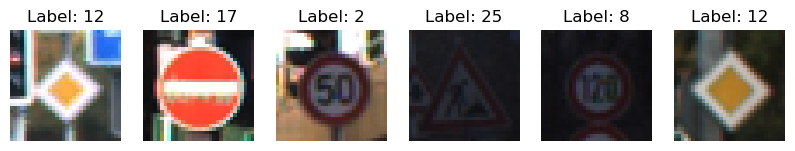

In [50]:
import matplotlib.pyplot as plt

def show_sample_images(images, labels, num_samples=6):
    # Generate a set of random indices to select images
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[idx])  # Use directly as already normalized
        ax.set_title(f'Label: {np.argmax(labels[idx])}')
        ax.axis('off')
    plt.show()

# Example usage:
show_sample_images(X_train, y_train)

In [58]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


# def build_model():
#     model = Sequential([
#         Input(shape=(32, 32, 3)),
#         Conv2D(32, (3, 3), activation='relu'),  # Update input shape based on your dataset
#         MaxPooling2D(2, 2),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(2, 2),
#         Conv2D(128, (3, 3), activation='relu'),
#         Flatten(),
#         Dense(512, activation='relu'),
#         Dropout(0.5),
#         Dense(43, activation='softmax')  # Number of classes
#     ])
#     return model


# model = build_model()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(43, activation='softmax')
])

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)  # Adjust epochs, batch size as necessary

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.5584 - loss: 1.5710 - val_accuracy: 3.8256e-04 - val_loss: 19.3407
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9656 - loss: 0.1259 - val_accuracy: 0.0010 - val_loss: 24.6710
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.0014 - val_loss: 20.8483
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.0014 - val_loss: 23.2408
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.0010 - val_loss: 28.9950
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.0015 - val_loss: 23.3574
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.0013 - val_loss: 25.7827
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9932 - loss

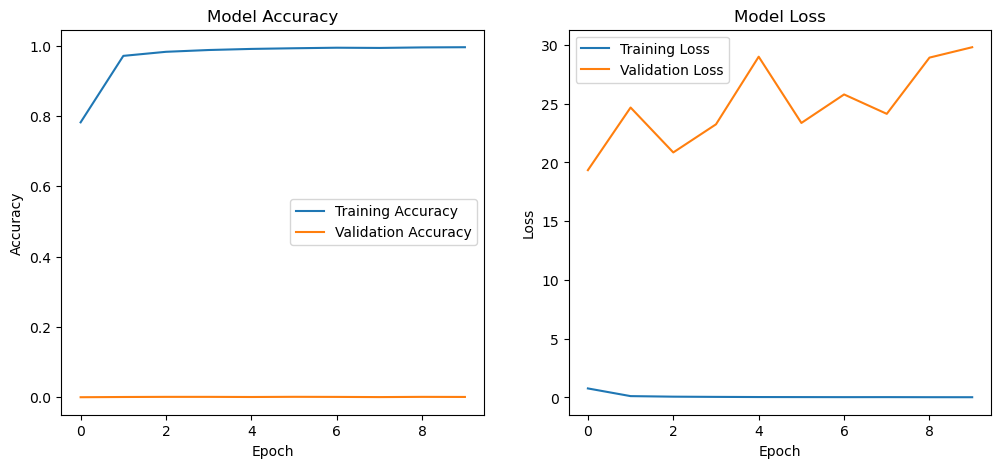

In [60]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

plot_history(history)

In [54]:
model.save('traffic_sign_model.keras')

Epoch 1/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9454 - loss: 0.2889 - val_accuracy: 0.9547 - val_loss: 0.2414
Epoch 2/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.9942 - loss: 0.0200 - val_accuracy: 0.9584 - val_loss: 0.2059
Epoch 3/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9950 - loss: 0.0174 - val_accuracy: 0.9582 - val_loss: 0.2946
Epoch 4/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9954 - loss: 0.0168 - val_accuracy: 0.9523 - val_loss: 0.3230
Epoch 5/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.9952 - loss: 0.0199 - val_accuracy: 0.9566 - val_loss: 0.2749
Epoch 6/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9542 - val_loss: 0.2730
Epoch 7/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.9956 - loss: 0.0171 - val_accuracy: 0.9599 - val_loss: 0.2315
Epoch 8/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.9965 -

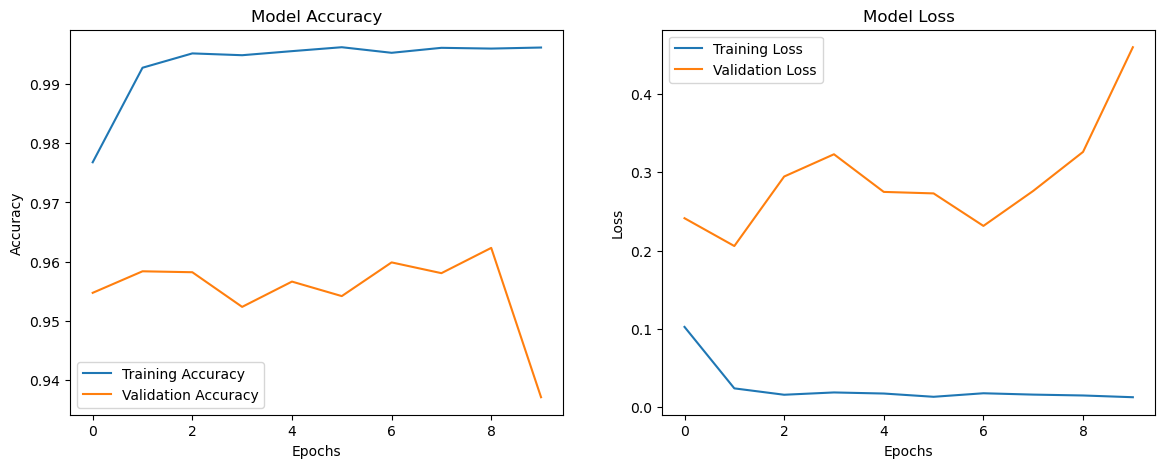

In [62]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example usage:
# history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32) 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
plot_training_history(history)


In [66]:
model.save('traffic_sign_model2.keras')

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


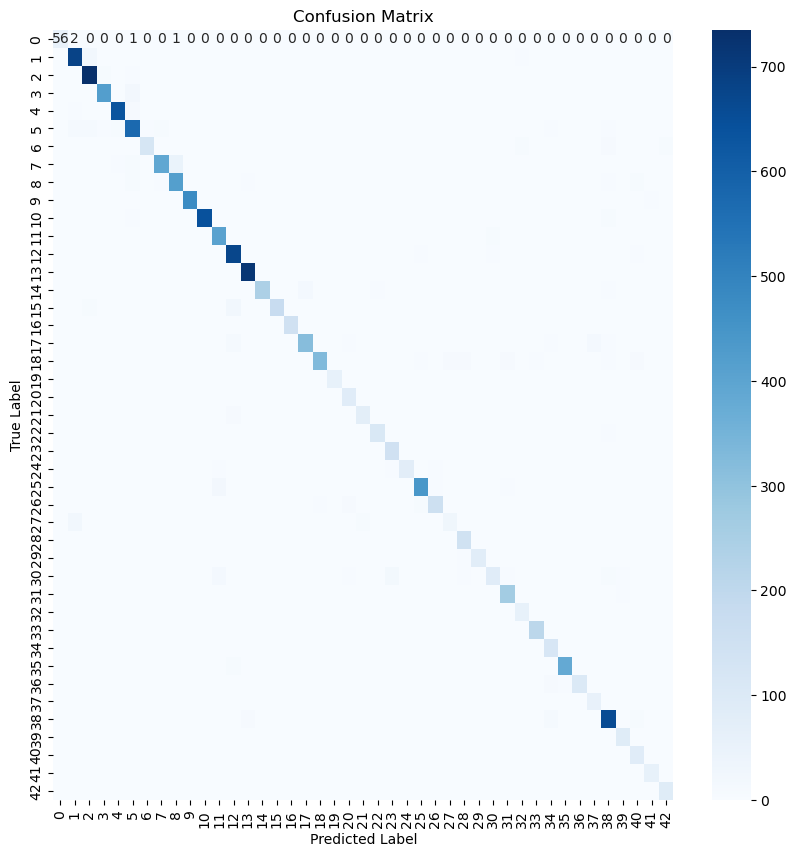

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_true, y_pred_classes, classes=np.arange(43))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


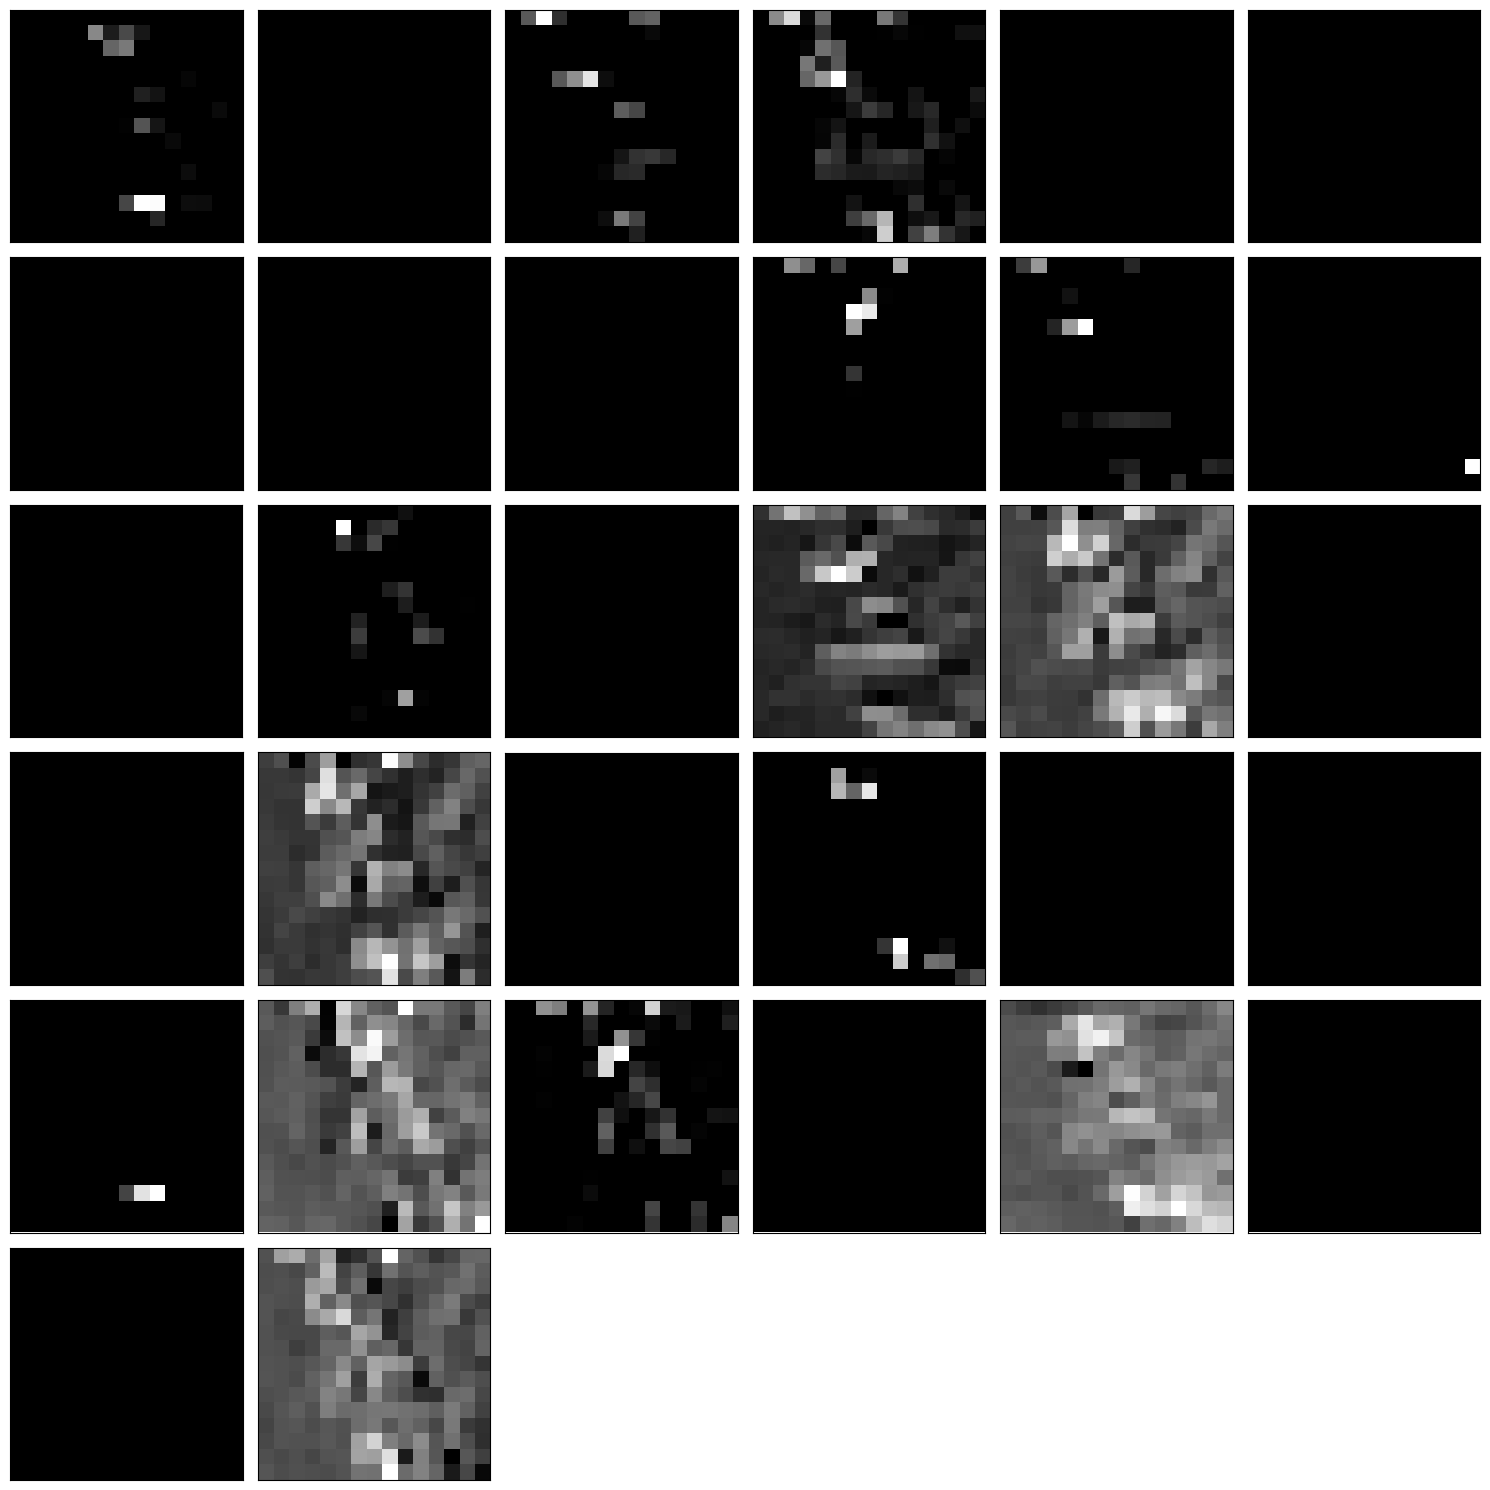

In [65]:
from tensorflow.keras.models import Model

def plot_feature_maps(model, layer_id, image_input):
    model = Model(inputs=model.inputs, outputs=model.layers[layer_id].output)
    feature_maps = model.predict(image_input)

    # Determine the number of feature maps
    num_maps = feature_maps.shape[-1]
    # Calculate the grid size for plotting (square root of the number of maps)
    square = int(np.sqrt(num_maps)) + 1  # Ensure enough space
    
    plt.figure(figsize=(15, 15))
    for i in range(1, num_maps + 1):
        ax = plt.subplot(square, square, i)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, i - 1], cmap='gray')
    plt.tight_layout()
    plt.show()

# Example usage:
image_input = np.expand_dims(X_train[0], axis=0)  # Example: Use the first image from training set
plot_feature_maps(model, layer_id=1, image_input=image_input)



In [ ]:
def plot_filters(layer):
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters, ix = 6, 1
    plt.figure(figsize=(20, 5))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):  # 3 channels
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    plt.show()

# Example usage:
plot_filters(model.layers[0])
